In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.16.1'

In [3]:
# Create features and labels
X = tf.range(3.0, 2000.0, 2, dtype=tf.float32)

y = tf.range(7.0, 4001.0, 4, dtype=tf.float32)

In [4]:
X[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([ 3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21.], dtype=float32)>

In [5]:
y[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([ 7., 11., 15., 19., 23., 27., 31., 35., 39., 43.], dtype=float32)>

In [6]:
len(X), len(y)

(999, 999)

In [7]:
X.shape, y.shape

(TensorShape([999]), TensorShape([999]))

In [8]:
import numpy as np
import matplotlib.pyplot as plt

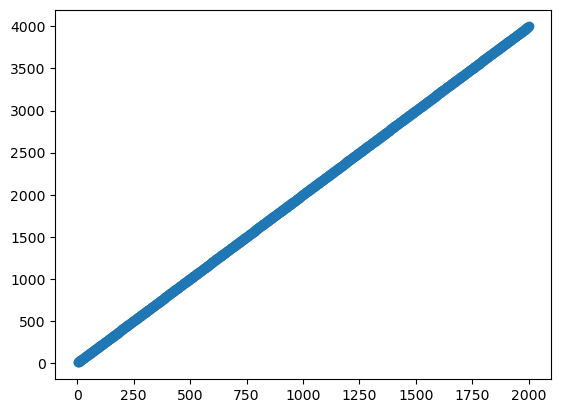

In [9]:
plt.scatter(X, y)

In [10]:
tf.expand_dims(X, axis=-1)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)>

In [11]:
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

# Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=10)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 322us/step - loss: 4684.9248 - mae: 4684.9248
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 285us/step - loss: 4698.4487 - mae: 4698.4487
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 246us/step - loss: 4723.4097 - mae: 4723.4097
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 207us/step - loss: 4716.6450 - mae: 4716.6450
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 204us/step - loss: 4723.4097 - mae: 4723.4097
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4716.6450 - mae: 4716.6450
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 189us/step - loss: 4723.4097 - mae: 4723.4097
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 191us/step - loss: 4716.6450 - mae: 4716.6450
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 188us/step - loss: 4723.4097 - mae: 4723.4097
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 187us/step - loss: 4716.6450 - mae: 4716.6450


In [12]:
model.predict(tf.expand_dims(tf.constant(2), axis=-1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([[6.945709]], dtype=float32)

In [13]:
import tensorflow as tf
from sklearn.model_selection import train_test_split


# Features and labels
X = tf.range(3.0, 2000.0, 2, dtype=tf.float32)
# Add an extra dimension
X = tf.expand_dims(X, axis=1)

y = tf.range(7.0, 4001.0, 4, dtype=tf.float32)
# Add an extra dimension
y = tf.expand_dims(y, axis=1)


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X.numpy(), y.numpy(), random_state=42, test_size=0.2)


# Convert back to TensorFlow tensors
X_train = tf.convert_to_tensor(X_train, dtype=tf.float32)
X_test = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_train = tf.convert_to_tensor(y_train, dtype=tf.float32)
y_test = tf.convert_to_tensor(y_test, dtype=tf.float32)


# Model
class LinearRegressionModel(tf.keras.Model):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear_layer = tf.keras.layers.Dense(units=1)

    def call(self, inputs):
        return self.linear_layer(inputs)

tf.random.set_seed(42)

model = LinearRegressionModel()

# Loss function
loss_fn = tf.keras.losses.MeanAbsoluteError()

# Optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.00001)

# Training the model
epochs = 1000

# Training loop
for epoch in range(epochs):
    # Training step
    with tf.GradientTape() as tape:
        y_pred = model(X_train, training=True)
        loss = loss_fn(y_train, y_pred)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Testing step
    y_test_pred = model(X_test, training=False)
    test_loss = loss_fn(y_test, y_test_pred)

    if epoch % 100 == 0:
        print(f'Epoch: {epoch} | Train loss: {loss.numpy()} | Test loss: {test_loss.numpy()}')

# Making predictions
y_preds = model(X_test)
print(X_test[:10], y_preds[:10].numpy(), y_test[:10])

Epoch: 0 | Train loss: 3153.068603515625 | Test loss: 3221.045654296875
Epoch: 100 | Train loss: 2160.938232421875 | Test loss: 2204.319091796875
Epoch: 200 | Train loss: 1168.8082275390625 | Test loss: 1187.5926513671875
Epoch: 300 | Train loss: 176.6811065673828 | Test loss: 170.86935424804688
Epoch: 400 | Train loss: 7.568288326263428 | Test loss: 2.380443811416626
Epoch: 500 | Train loss: 8.415907859802246 | Test loss: 1.5146523714065552
Epoch: 600 | Train loss: 8.540121078491211 | Test loss: 1.3891737461090088
Epoch: 700 | Train loss: 8.449240684509277 | Test loss: 1.4801535606384277
Epoch: 800 | Train loss: 7.80860710144043 | Test loss: 2.1354007720947266
Epoch: 900 | Train loss: 6.923802375793457 | Test loss: 3.036538600921631
tf.Tensor(
[[ 909.]
 [1589.]
 [ 421.]
 [ 621.]
 [1483.]
 [1159.]
 [1793.]
 [1093.]
 [ 875.]
 [1359.]], shape=(10, 1), dtype=float32) [[1825.5197]
 [3191.1426]
 [ 845.4847]
 [1247.1383]
 [2978.2659]
 [2327.587 ]
 [3600.8293]
 [2195.0413]
 [1757.2385]
 [2729

In [14]:
X_train.shape, X_test.shape

(TensorShape([799, 1]), TensorShape([200, 1]))

In [15]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

In [16]:
y_preds.numpy().shape

(200, 1)

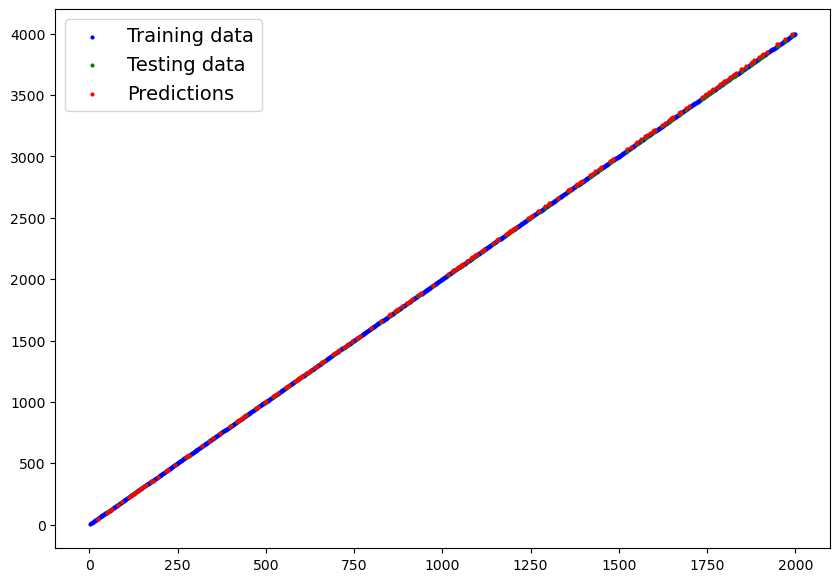

In [17]:
plot_predictions(predictions=y_preds)

In [18]:
model.summary()

Model: "linear_regression_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ ?                      │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)